Take grayscale image of size 512x512, add some salt & pepper noise and perform the following

//
c) Apply harmonic and geometric mean filter on the noisy image and compare their 
performance with PSNR

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("../resources/seageal.jpg")

img.shape 

(233, 350, 3)

In [3]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img= cv2.resize(img, (512,512))
img.shape

(512, 512)

In [4]:
img

array([[ 67,  67,  67, ..., 255, 255, 255],
       [ 67,  67,  67, ..., 255, 255, 255],
       [ 68,  68,  68, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [4]:
def add_salt_and_pepper_noise(image):
    salt_prob = 0.01
    pepper_prob = 0.01
    noisy_image = image.copy()
    total_pixels = image.size

    num_salt = int(total_pixels * salt_prob)
    print(num_salt)
    #salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    salt_coords = []

    for i in image.shape:
        salt_coord_dimension = np.random.randint(0, i - 1, num_salt)
        salt_coords.append(salt_coord_dimension)

    print(salt_coords)
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    num_pepper = int(total_pixels * pepper_prob)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

In [6]:
dim =img.ndim
dim

2

In [5]:
noisy = add_salt_and_pepper_noise(img)

2621
[array([314, 202, 502, ..., 384, 283, 127]), array([153, 464, 246, ...,  38,  95, 155])]


In [8]:
def apply_average_filter(image, kernel_size):
    rows, cols = image.shape
    result = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            sum_val = 0
            count = 0
            for m in range(-kernel_size // 2, kernel_size // 2 + 1):
                for n in range(-kernel_size // 2, kernel_size // 2 + 1):
                    if 0 <= i + m < rows and 0 <= j + n < cols:
                        sum_val += image[i + m, j + n]
                        count += 1

            result[i, j] = sum_val / count

    return result 

In [9]:
#median filter:

def apply_median_filter(image, kernel_size):
    rows, cols = image.shape
    result = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            values = []
            for m in range(-kernel_size // 2, kernel_size // 2 + 1):
                for n in range(-kernel_size // 2, kernel_size // 2 + 1):
                    if 0 <= i + m < rows and 0 <= j + n < cols:
                        values.append(image[i + m, j + n])

            result[i, j] = np.median(values)

    return result

psnr calculator:

In [10]:
def psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

In [11]:
psnr(img,noisy)

21.02

Now do average(mean) filter for smoothing

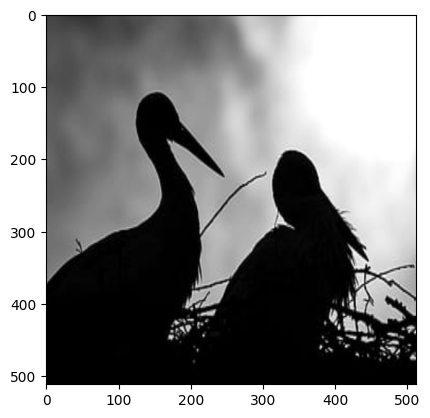

In [12]:
plt.imshow(img,cmap="gray")

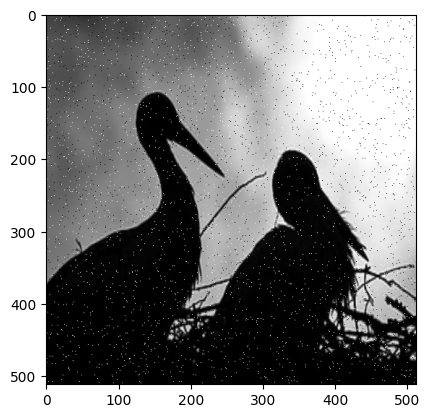

In [13]:
plt.imshow(noisy,cmap="gray")

In [14]:
meanFilter = apply_average_filter(img,6)
psnr(img,meanFilter)

26.44

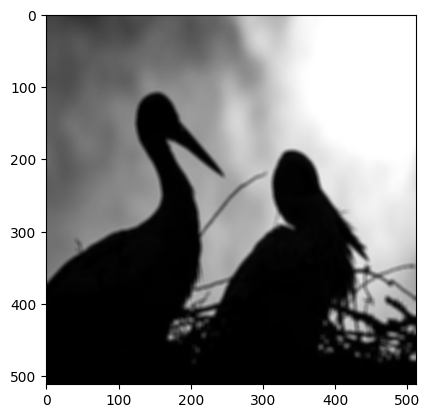

In [15]:
plt.imshow(meanFilter,cmap="gray");

In [16]:
MedianFilter = apply_median_filter(img,6)
psnr(img,MedianFilter)

27.96

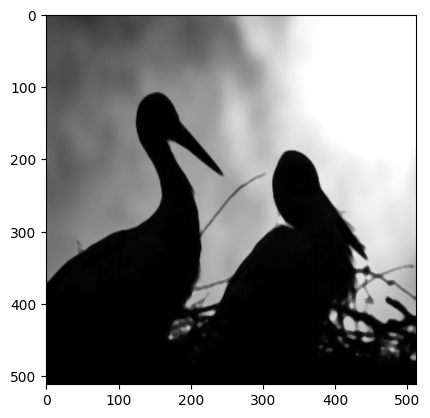

In [17]:
plt.imshow(MedianFilter,cmap="gray")

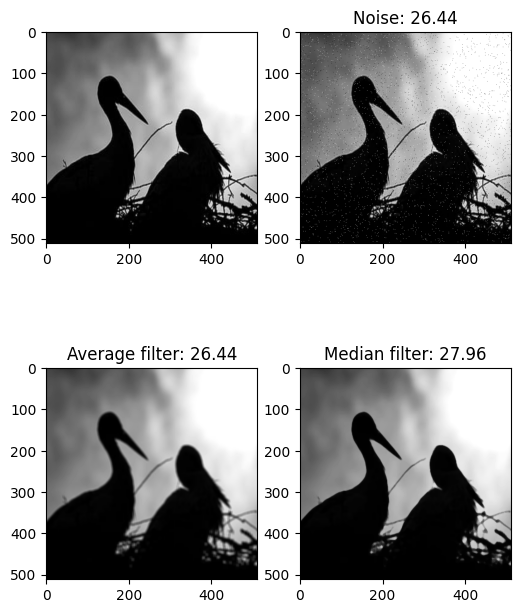

In [18]:
plt.figure(figsize=(6,8))
plt.subplot(2,2,1)
plt.imshow(img,cmap="gray")

plt.subplot(2,2,2)
plt.imshow(noisy,cmap="gray")
plt.title(f"Noise: {psnr(img,meanFilter)}" )

plt.subplot(2,2,3)
plt.title(f"Average filter: {psnr(img,meanFilter)}" )
plt.imshow(meanFilter,cmap="gray");

plt.subplot(2,2,4)
plt.title(f"Median filter: {psnr(img,MedianFilter)}" )

plt.imshow(MedianFilter,cmap="gray")
